In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from scipy.misc import imread, toimage
from sklearn.metrics import accuracy_score
import gzip
from mnist import MNIST
from tk_package.utils.helper import dense_to_one_hot, preproc, batch_creator, show

root_dir = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
data_dir = os.path.join(root_dir, 'data')
sub_dir = os.path.join(root_dir, 'sub')

seed = 128
rng = np.random.RandomState(seed)

mndata = MNIST(data_dir)

In [2]:
X_train, y_train = mndata.load_training()
X_test, y_test = mndata.load_testing()

In [3]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [4]:
split_size = int(len(X_train)*0.7)
train_x, val_x = X_train[:split_size,:], X_train[split_size:,:]
train_y, val_y = y_train[:split_size], y_train[split_size:]

### set all variables

In [133]:

# number of neurons in each layer
input_num_units = 28*28
hidden1_num_units = 20000
# hidden2_num_units = 1000
# hidden3_num_units = 500
output_num_units = 10

# define placeholders
x = tf.placeholder(tf.float32, [None, input_num_units])
y = tf.placeholder(tf.float32, [None, output_num_units])

# set remaining variables
epochs = 800
batch_size = 128
learning_rate = 0.01

### define weights and biases of the neural network (refer this article if you don't understand the terminologies)

weights = {
    'hidden1': tf.Variable(tf.random_normal([input_num_units, hidden1_num_units], seed=seed)),
    'hidden2': tf.Variable(tf.random_normal([hidden1_num_units, hidden2_num_units], seed=seed)),
    'hidden3': tf.Variable(tf.random_normal([hidden2_num_units, hidden3_num_units], seed=seed)),
    'output': tf.Variable(tf.random_normal([hidden1_num_units, output_num_units], seed=seed))
}

biases = {
    'hidden1': tf.Variable(tf.random_normal([hidden1_num_units], seed=seed)),
    'hidden2': tf.Variable(tf.random_normal([hidden2_num_units], seed=seed)),
    'hidden3': tf.Variable(tf.random_normal([hidden3_num_units], seed=seed)),
    'output': tf.Variable(tf.random_normal([output_num_units], seed=seed))
}

In [134]:
hidden_layer1 = tf.add(tf.matmul(x, weights['hidden1']), biases['hidden1'])
hidden_layer1 = tf.nn.relu(hidden_layer1)

# hidden_layer2 = tf.add(tf.matmul(hidden_layer1, weights['hidden2']), biases['hidden2'])
# hidden_layer2 = tf.nn.relu(hidden_layer2)

# hidden_layer3 = tf.add(tf.matmul(hidden_layer2, weights['hidden3']), biases['hidden3'])
# hidden_layer3 = tf.nn.relu(hidden_layer3)

output_layer = tf.matmul(hidden_layer1, weights['output']) + biases['output']

In [135]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer, labels=y))

In [136]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [137]:
init = tf.global_variables_initializer()

In [138]:
with tf.Session() as sess:
    # create initialized variables
    sess.run(init)
    
    ### for each epoch, do:
    ###   for each batch, do:
    ###     create pre-processed batch
    ###     run optimizer by feeding batch
    ###     find cost and reiterate to minimize
    
    for epoch in range(epochs):
        avg_cost = 0
        total_batch = int(len(train_x)/batch_size)
        if epoch % 10 == 0:
            print('Running')
        for i in range(total_batch):
            _, c = sess.run([optimizer, cost], feed_dict = {x: train_x[(i)*batch_size:(i+1)*batch_size,:], y: dense_to_one_hot(train_y[(i)*batch_size:(i+1)*batch_size])})
            avg_cost += c / total_batch
        
        if epoch % 10 == 0:
            print ("Epoch:", (epoch+1), "cost =", "{:.5f}".format(avg_cost))
    
    print ("\nTraining complete!")
    
    
    # find predictions on val set
    pred_temp = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(pred_temp, "float"))
    print ("Validation Accuracy:", accuracy.eval({x: val_x.reshape(-1, input_num_units), y: dense_to_one_hot(val_y)}))
    
    predict = tf.argmax(output_layer, 1)
    pred = predict.eval({x: X_test.reshape(-1, input_num_units)})

Running
Epoch: 1 cost = 52824.58685
Running
Epoch: 11 cost = 1532.44092
Running
Epoch: 21 cost = 1404.54209
Running
Epoch: 31 cost = 775.15038
Running
Epoch: 41 cost = 720.77252
Running
Epoch: 51 cost = 271.80591
Running
Epoch: 61 cost = 603.08965
Running
Epoch: 71 cost = 506.35456
Running
Epoch: 81 cost = 439.72726
Running
Epoch: 91 cost = 278.36447
Running
Epoch: 101 cost = 270.08038
Running
Epoch: 111 cost = 350.15838
Running
Epoch: 121 cost = 96.55537
Running
Epoch: 131 cost = 175.65522
Running
Epoch: 141 cost = 417.31121
Running
Epoch: 151 cost = 178.73063
Running
Epoch: 161 cost = 105.64960
Running
Epoch: 171 cost = 206.19646
Running
Epoch: 181 cost = 407.92290
Running
Epoch: 191 cost = 476.20542
Running
Epoch: 201 cost = 198.92319
Running
Epoch: 211 cost = 0.00000
Running
Epoch: 221 cost = 0.00000
Running
Epoch: 231 cost = 0.00000
Running
Epoch: 241 cost = 0.00000
Running
Epoch: 251 cost = 0.00000
Running
Epoch: 261 cost = 0.00000
Running
Epoch: 271 cost = 0.00000
Running
Epoch:

Prediction is:  7


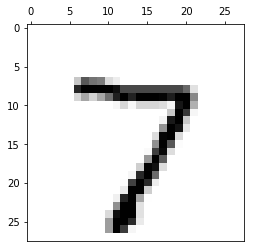

Prediction is:  2


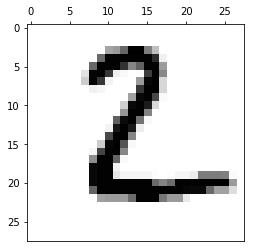

Prediction is:  1


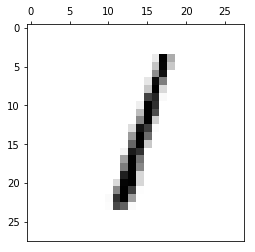

In [139]:
#97.772
%matplotlib inline
from PIL import Image
import pylab

for i in range(3):
    arr = X_test[i,:].reshape(-1,28)

    test_index = i

    print ("Prediction is: ", pred[test_index])

    show(arr)

Prediction is:  6 
Actual is:  4


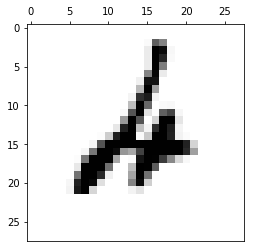

Prediction is:  7 
Actual is:  2


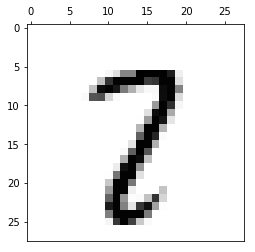

Prediction is:  3 
Actual is:  5


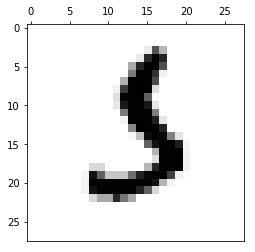

Prediction is:  0 
Actual is:  6


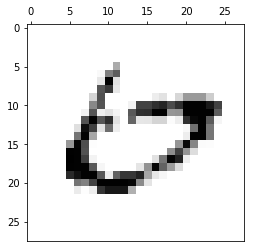

Prediction is:  9 
Actual is:  4


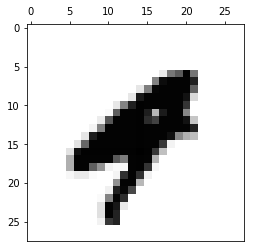

Prediction is:  2 
Actual is:  8


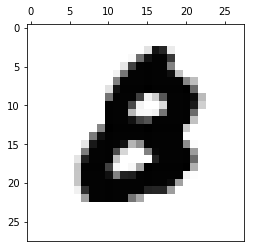

Prediction is:  3 
Actual is:  7


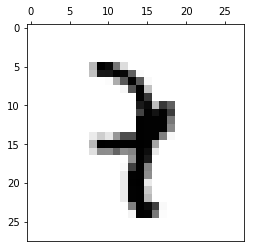

Prediction is:  2 
Actual is:  8


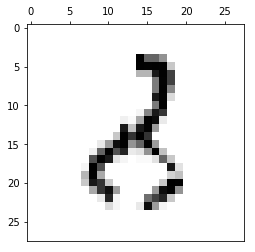

Prediction is:  8 
Actual is:  1


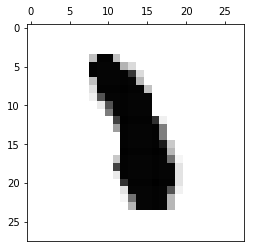

Prediction is:  6 
Actual is:  2


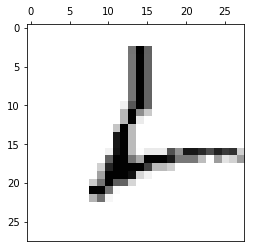

Prediction is:  4 
Actual is:  8


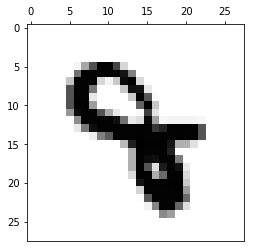

Prediction is:  9 
Actual is:  4


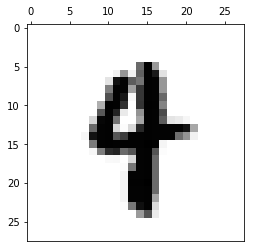

Prediction is:  8 
Actual is:  5


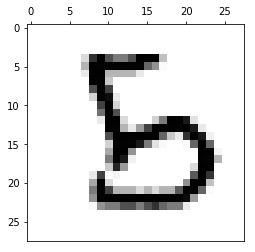

Prediction is:  7 
Actual is:  9


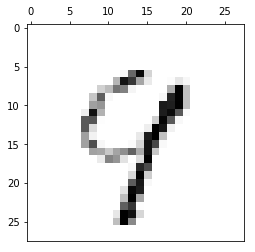

Prediction is:  5 
Actual is:  1


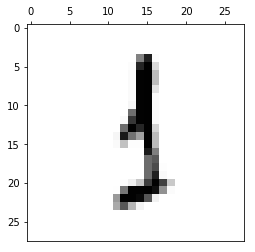

Prediction is:  9 
Actual is:  8


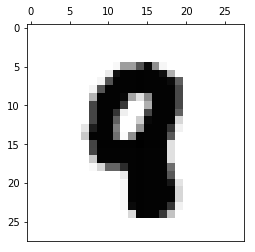

Prediction is:  4 
Actual is:  5


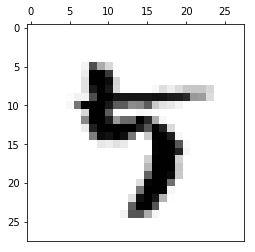

Prediction is:  5 
Actual is:  6


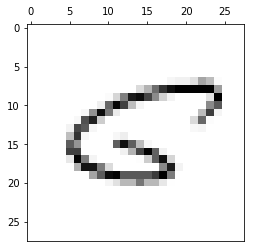

Prediction is:  2 
Actual is:  7


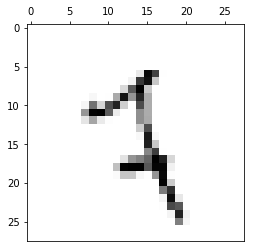

Prediction is:  6 
Actual is:  4


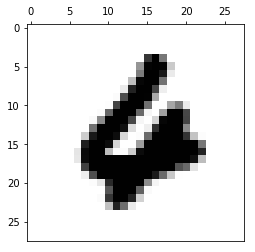

In [142]:
for i in range(20):
    mask = pred != y_test
    
    arr = X_test[mask][i,:].reshape(-1,28)

    test_index = i

    print ("Prediction is: ", pred[mask][test_index], '\nActual is: ', y_test[mask][test_index])

    show(arr)